# 装甲板识别

## 导入

In [4]:
from typing import Any, Sequence, Tuple

import cv2
from cv2 import Mat, imread
from cv2.typing import Size
from matplotlib import pyplot
from numpy import array, dtype, generic, ndarray
import matplotlib
import numpy

## 读取图像

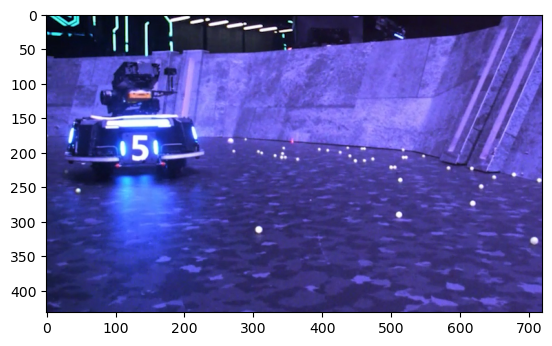

In [5]:
image: Mat = imread('Blue-5.jpeg')
# image: Mat = imread('Red-2.jpg')
# image: Mat = imread('VW_CH3RoboVigorVsRPS_BO2_1_109.jpg')
# image: Mat = imread('VW_CH3RoboGrinderVs交龙_BO2_1_108.jpg')
# image: Mat = imread('mimikko.jpg')
# image: Mat = imread('img.png')

pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### 尝试从HLS分离

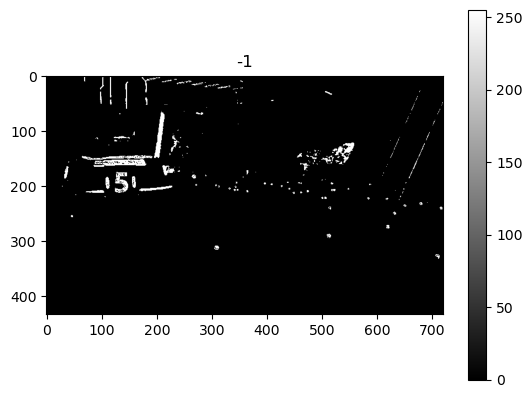

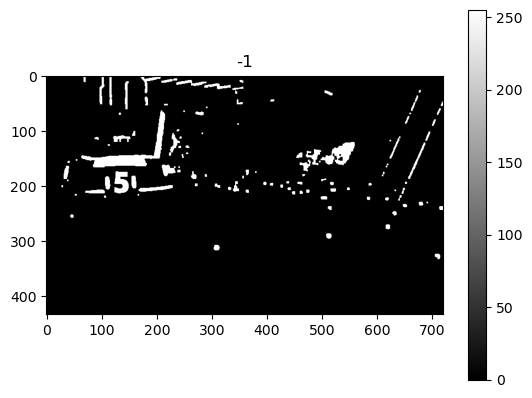

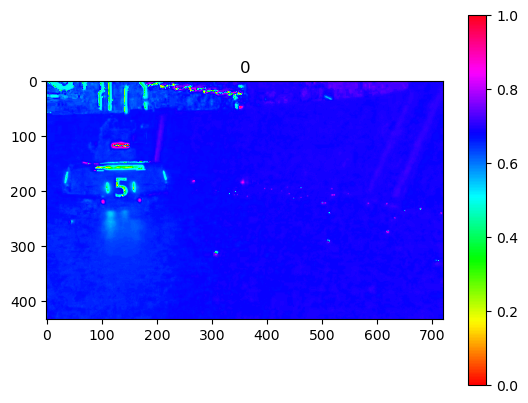

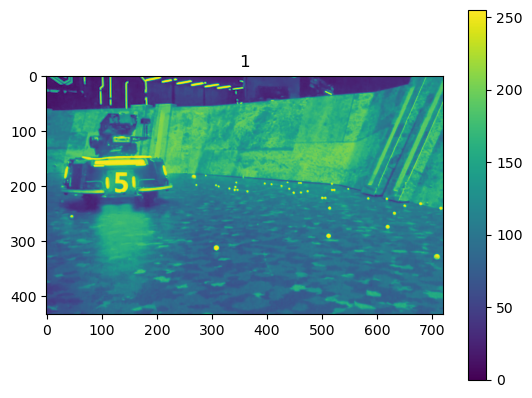

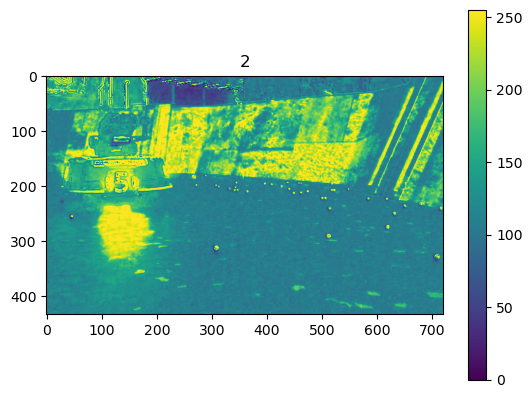

In [6]:
image_HLS = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

channels: Sequence[Mat] = cv2.split(image_HLS)
# cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

image_Light = cv2.inRange(image_HLS, array([0, 200, 200]), array([180, 255, 255]))
# image_Light = cv2.inRange(image_HLS, array([0, 0, 50]), array([180, 50, 255]))


pyplot.title(-1)
pyplot.imshow(image_Light, cmap = 'gray')
pyplot.colorbar()

pyplot.figure()
image_Light = cv2.dilate(image_Light, numpy.ones((5, 5)), iterations = 1)
image_Light = cv2.erode(image_Light, numpy.ones((3, 3)), iterations = 1)
# image_Light=cv2.dilate(image_Light, numpy.ones((3, 3)), iterations =1)

# pyplot.imshow(cv2.cvtColor(image_HLS, cv2.COLOR_BGR2RGB))
# pyplot.figure()

pyplot.title(-1)
pyplot.imshow(image_Light, cmap = 'gray')
pyplot.colorbar()

pyplot.figure()

pyplot.title(0)
cmap = matplotlib.cm.get_cmap('hsv')
norm = matplotlib.colors.Normalize(vmin = 0, vmax = 255)
pyplot.imshow(channels[0], cmap = cmap)
pyplot.colorbar(matplotlib.cm.ScalarMappable(cmap = cmap))

pyplot.figure()
pyplot.title(1)
pyplot.imshow(channels[1])
pyplot.colorbar()

pyplot.figure()
pyplot.title(2)
pyplot.imshow(channels[2])
pyplot.colorbar()

### 尝试分离轮廓

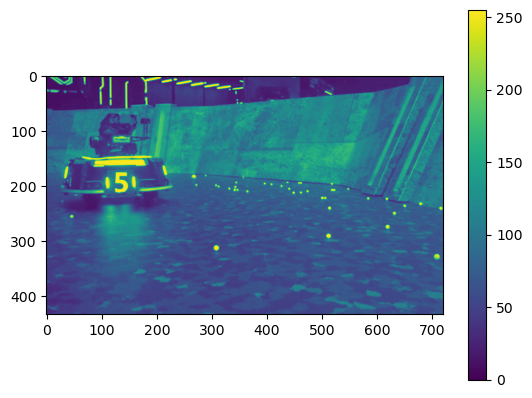

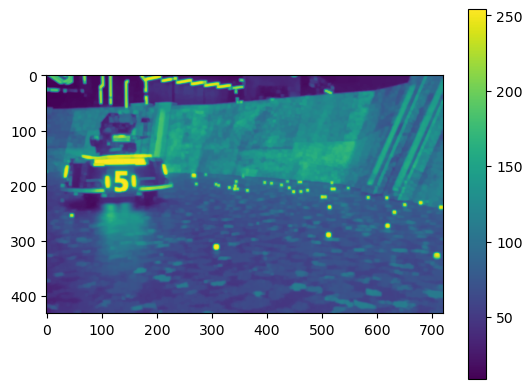

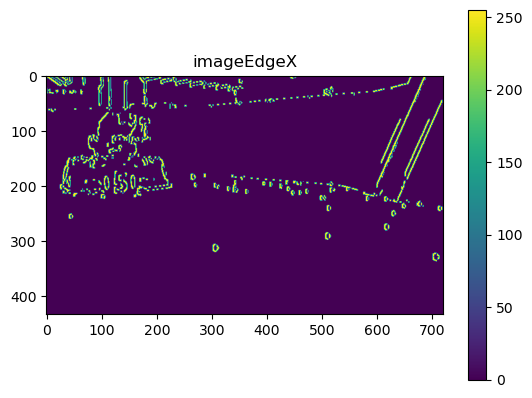

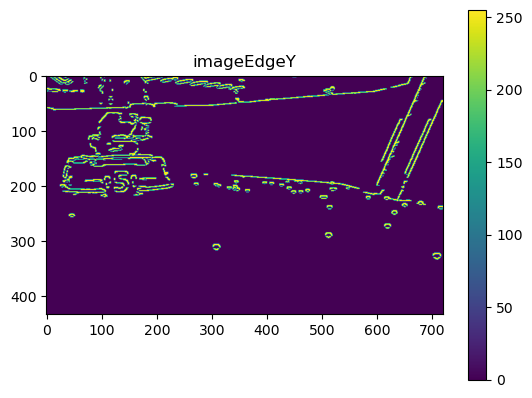

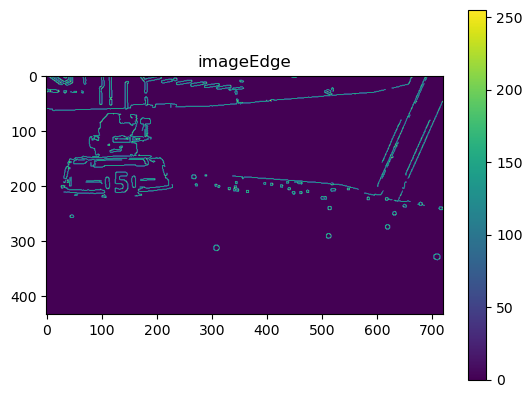

In [7]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
pyplot.imshow(imageGray)
pyplot.colorbar()
pyplot.figure()
imageGray = cv2.GaussianBlur(imageGray, array([5, 5]), 0, 0)
imageGray = cv2.dilate(imageGray, numpy.ones((5, 5)), iterations = 1)
imageGray = cv2.erode(imageGray, numpy.ones((3, 3)), iterations = 1)

imageEdge = cv2.Canny(channels[1], 200, 400)
imageEdgeX = cv2.Sobel(imageEdge, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 5)
imageEdgeY = cv2.Sobel(imageEdge, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 5)
pyplot.imshow(imageGray)
pyplot.colorbar()

pyplot.figure()
pyplot.title("imageEdgeX")
pyplot.imshow(imageEdgeX)
pyplot.colorbar()

pyplot.figure()
pyplot.title("imageEdgeY")
pyplot.imshow(imageEdgeY)
pyplot.colorbar()

pyplot.figure()
pyplot.title("imageEdge")
pyplot.imshow(imageEdge)
pyplot.colorbar()

### 尝试对轮廓池化

2023-11-08 16:19:00.609917: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 16:19:00.631221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 16:19:00.631251: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 16:19:00.631267: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 16:19:00.636861: I tensorflow/core/platform/cpu_feature_g

(432, 720)
1/1 [==============================] - 1s 896ms/step
(1, 216, 360, 1)


2023-11-08 16:19:03.556710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8906


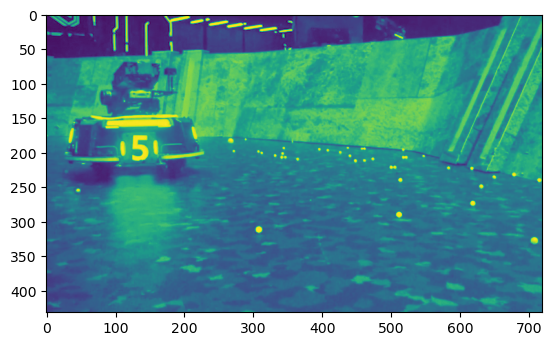

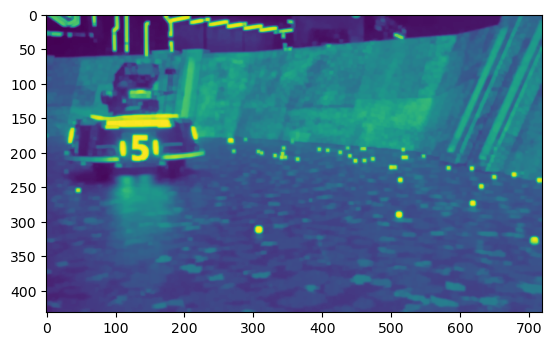

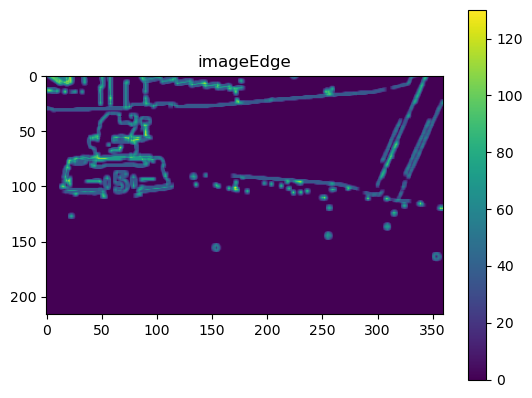

In [8]:
from keras import Input
import keras

inputs = Input((432, 720, 1))
max_pool = keras.layers.AvgPool2D(pool_size = (7,7),strides = (2, 2),padding = 'same')(inputs)

model = keras.Model(inputs, max_pool)

print(imageEdge.shape)

predict = model.predict(imageEdge.reshape((1, 432, 720, 1)))
imageEdge = cv2.Canny(imageGray, 200, 400)

print(predict.shape)

pyplot.imshow(channels[1])
pyplot.figure()
pyplot.imshow(imageGray)

pyplot.figure()
pyplot.title("imageEdge")
pyplot.imshow(predict.reshape((  216, 360,)))
pyplot.colorbar()

#### 尝试传统算法

In [9]:
cv2.namedWindow("1")
capture = cv2.VideoCapture('/mnt/e/8-11东大2No.4.avi')
# capture = cv2.VideoCapture('1.mp4')
while capture.isOpened():
    img: Mat | ndarray[Any, dtype[generic]] | ndarray
    flag,img = capture.read()      
    

    if not flag: break

    # print(img.shape)
    # print(image.shape)
    cv2.imshow("1",img)
    # pyplot.figure()
# pyplot.imshow(img)
    cv2.waitKey(5)